In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Ejercicio 1.1: Perfil Epidemiológico de Enfermedades Cardiovasculares

Estadísticas Descriptivas:
              Edad   Colesterol  Presión Arterial          IMC     Diabetes
count  1000.000000  1000.000000       1000.000000  1000.000000  1000.000000
mean     55.289981   201.189340        130.073522    26.769855     0.304000
std      14.688239    39.362703         20.131601     5.060626     0.460213
min       6.380990    79.219514         70.177281    11.961838     0.000000
25%      45.286145   175.148078        115.795433    23.424893     0.000000
50%      55.379509   200.670756        130.070712    26.798203     0.000000
75%      64.719158   227.370264        143.647426    29.927253     1.000000
max     112.790972   327.724303        208.524754    43.215465     1.000000


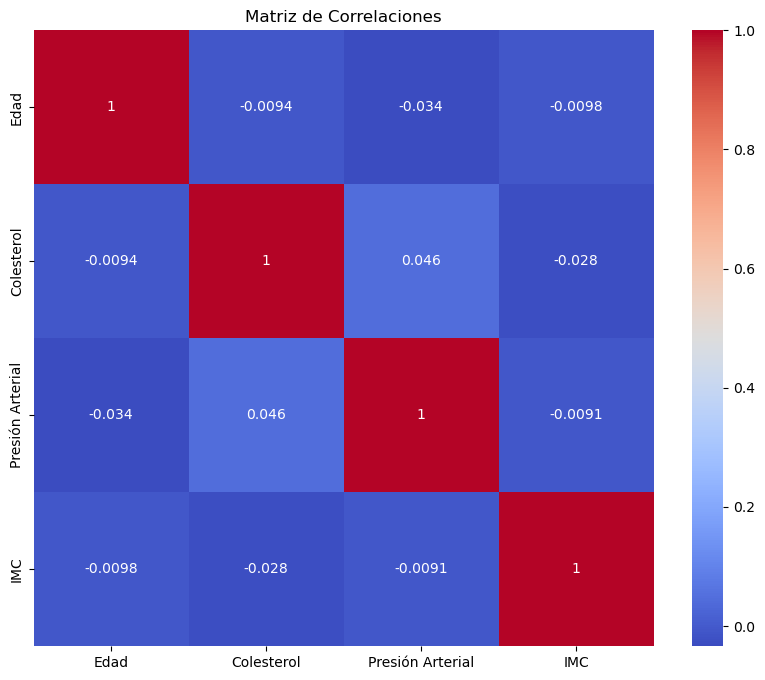

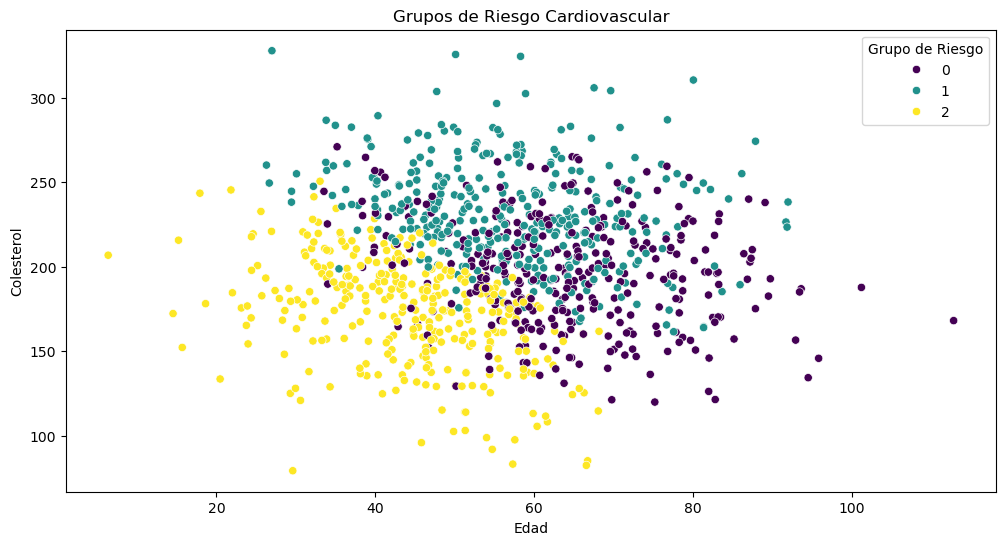


Riesgo Cardiovascular por Género:
Género
Femenino     0.322896
Masculino    0.554192
Name: Riesgo Cardiovascular, dtype: float64

Prueba t de diferencia de riesgo por género:
Estadístico t: 7.574484068278763
Valor p: 8.202755546699096e-14


In [3]:
def generar_datos_cardiovasculares(n_muestras=1000):
    np.random.seed(42)
    
    # Generación de variables
    edad = np.random.normal(55, 15, n_muestras)
    genero = np.random.choice(['Masculino', 'Femenino'], n_muestras)
    colesterol = np.random.normal(200, 40, n_muestras)
    presion_arterial = np.random.normal(130, 20, n_muestras)
    imc = np.random.normal(27, 5, n_muestras)
    diabetes = np.random.choice([0, 1], n_muestras, p=[0.7, 0.3])
    
    # Cálculo de riesgo cardiovascular
    riesgo = (
        (edad > 50) * 0.3 + 
        (genero == 'Masculino') * 0.2 + 
        (colesterol > 240) * 0.25 + 
        (presion_arterial > 140) * 0.2 + 
        (imc > 30) * 0.15 + 
        (diabetes == 1) * 0.3
    )
    
    # Convertir a DataFrame
    df = pd.DataFrame({
        'Edad': edad,
        'Género': genero,
        'Colesterol': colesterol,
        'Presión Arterial': presion_arterial,
        'IMC': imc,
        'Diabetes': diabetes,
        'Riesgo Cardiovascular': riesgo > 0.5
    })
    
    return df

# Generar datos
datos_cv = generar_datos_cardiovasculares()

# Solución Detallada
def analisis_perfil_cardiovascular(df):
    # 1. Estadísticas descriptivas
    print("Estadísticas Descriptivas:")
    print(df.describe())
    
    # 2. Correlaciones
    correlaciones = df[['Edad', 'Colesterol', 'Presión Arterial', 'IMC']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
    plt.title('Matriz de Correlaciones')
    plt.show()
    
    # 3. Segmentación por grupos de riesgo
    features = ['Edad', 'Colesterol', 'Presión Arterial', 'IMC']
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(df[features])
    
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Grupo de Riesgo'] = kmeans.fit_predict(datos_escalados)
    
    # 4. Visualización de grupos de riesgo
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Edad', y='Colesterol', hue='Grupo de Riesgo', palette='viridis')
    plt.title('Grupos de Riesgo Cardiovascular')
    plt.show()
    
    # 5. Análisis de riesgo por género
    riesgo_por_genero = df.groupby('Género')['Riesgo Cardiovascular'].mean()
    print("\nRiesgo Cardiovascular por Género:")
    print(riesgo_por_genero)
    
    # 6. Prueba estadística de diferencia de riesgo por género
    riesgo_masculino = df[df['Género'] == 'Masculino']['Riesgo Cardiovascular']
    riesgo_femenino = df[df['Género'] == 'Femenino']['Riesgo Cardiovascular']
    
    t_statistic, p_value = stats.ttest_ind(riesgo_masculino, riesgo_femenino)
    print(f"\nPrueba t de diferencia de riesgo por género:")
    print(f"Estadístico t: {t_statistic}")
    print(f"Valor p: {p_value}")

# Ejecutar análisis
analisis_perfil_cardiovascular(datos_cv)

### Ejercicio 1.2: Análisis de Ensayo Clínico

Comparación entre Grupos:
           Grupo  Marcador_Inicial  Marcador_Final  Efectos_Secundarios  \
0       Control         99.450817       99.450817             0.046854   
1  Intervención        100.259558       80.329114             0.191235   

   Tiempo_Recuperacion  
0            21.023350  
1            13.745386  

Prueba t para Marcadores:
Estadístico t: -19.9288
Valor p: 2.0533e-78

Efectos Secundarios por Rango de Dosis:
 Dosis
(50.333, 87.8]        0.165829
(87.8, 125.117]       0.211957
(125.117, 162.435]    0.194737
(162.435, 199.752]    0.194444
Name: Efectos_Secundarios, dtype: float64


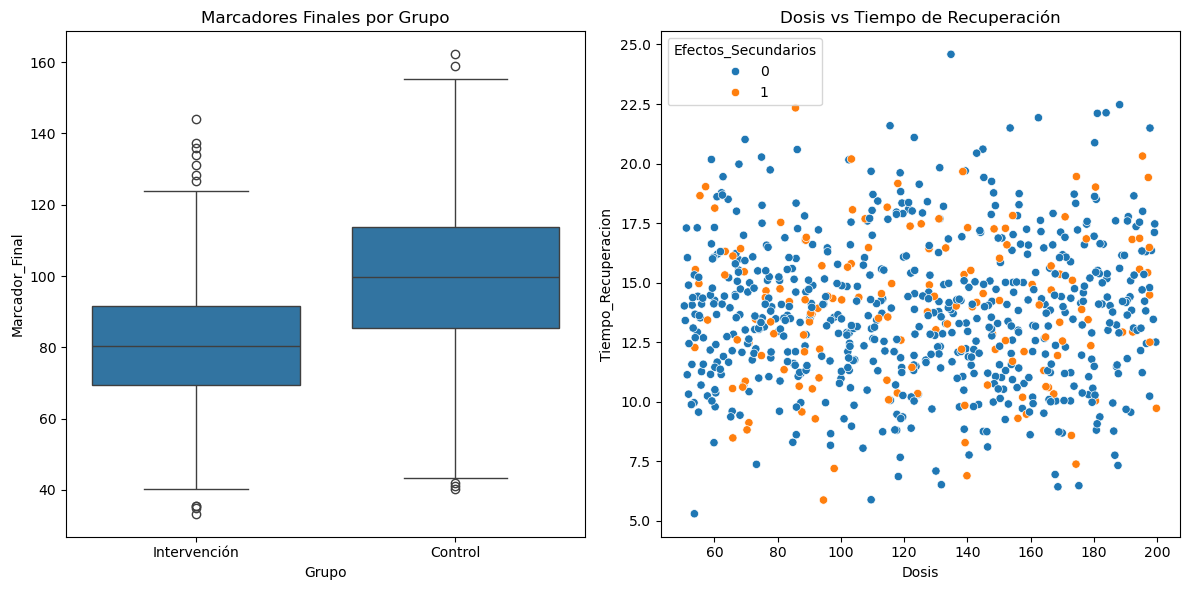


Modelo de Regresión - Dosis vs Marcador:
Pendiente: -0.0034
Intercepto: 80.7483


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# Función para generar datos simulados de un ensayo clínico
def generar_datos_ensayo_clinico(n_muestras=1500, semilla=42):
    np.random.seed(semilla)  # Fijar semilla para reproducibilidad

    # Asignar aleatoriamente los grupos de estudio: 'Intervención' o 'Control'
    grupo = np.random.choice(['Intervención', 'Control'], n_muestras)

    # Asignar dosis sólo al grupo de intervención, el grupo control recibe 0
    dosis = np.where(grupo == 'Intervención',
                     np.random.uniform(50, 200, n_muestras),
                     np.zeros(n_muestras))

    # Simular valores del marcador biológico inicial
    marcador_base = np.random.normal(100, 20, n_muestras)

    # Reducir el marcador en el grupo de intervención en un porcentaje aleatorio
    reduccion = np.random.uniform(0.1, 0.3, n_muestras)
    marcador_final = np.where(grupo == 'Intervención', marcador_base * (1 - reduccion), marcador_base)

    # Simular la aparición de efectos secundarios (1 = sí, 0 = no)
    efectos_secundarios = np.random.binomial(1, np.where(grupo == 'Intervención', 0.2, 0.05), n_muestras)

    # Simular tiempo de recuperación en días, dependiendo del grupo
    tiempo_recuperacion = np.random.normal(np.where(grupo == 'Intervención', 14, 21), 3, n_muestras)

    # Crear DataFrame con los datos generados
    df = pd.DataFrame({
        'ID': range(1, n_muestras + 1),
        'Grupo': grupo,
        'Dosis': dosis,
        'Marcador_Inicial': marcador_base,
        'Marcador_Final': marcador_final,
        'Efectos_Secundarios': efectos_secundarios,
        'Tiempo_Recuperacion': tiempo_recuperacion
    })

    return df

# Generar datos simulados
datos_ensayo = generar_datos_ensayo_clinico()

# Función para analizar los datos del ensayo clínico
def analisis_ensayo_clinico(df):
    # 1. Análisis comparativo de grupos: promedios por grupo
    comparacion_grupos = df.groupby('Grupo').agg({
        'Marcador_Inicial': 'mean',
        'Marcador_Final': 'mean',
        'Efectos_Secundarios': 'mean',
        'Tiempo_Recuperacion': 'mean'
    }).reset_index()
    print("Comparación entre Grupos:\n", comparacion_grupos)

    # 2. Prueba de significancia (t-test) entre los marcadores finales de ambos grupos
    grupo_intervencion = df[df['Grupo'] == 'Intervención']['Marcador_Final']
    grupo_control = df[df['Grupo'] == 'Control']['Marcador_Final']

    t_statistic, p_value = stats.ttest_ind(grupo_intervencion, grupo_control, equal_var=False)
    print(f"\nPrueba t para Marcadores:\nEstadístico t: {t_statistic:.4f}\nValor p: {p_value:.4e}")

    # 3. Promedio de efectos secundarios por rango de dosis en el grupo de intervención
    efectos_por_dosis = (df[df['Grupo'] == 'Intervención']
                         .groupby(pd.cut(df[df['Grupo'] == 'Intervención']['Dosis'], bins=4), observed=False)
                         ['Efectos_Secundarios'].mean())
    print("\nEfectos Secundarios por Rango de Dosis:\n", efectos_por_dosis)

    # 4. Visualización de resultados
    plt.figure(figsize=(12, 6))

    # Boxplot de los marcadores finales por grupo
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Grupo', y='Marcador_Final', data=df)
    plt.title('Marcadores Finales por Grupo')

    # Scatterplot de dosis vs tiempo de recuperación en el grupo de intervención
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Dosis', y='Tiempo_Recuperacion', hue='Efectos_Secundarios', data=df[df['Grupo'] == 'Intervención'])
    plt.title('Dosis vs Tiempo de Recuperación')

    plt.tight_layout()
    plt.show()

    # 5. Análisis de regresión lineal: relación entre dosis y marcador final
    X = df[df['Grupo'] == 'Intervención'][['Dosis']]
    y_marcador = df[df['Grupo'] == 'Intervención']['Marcador_Final']

    modelo = LinearRegression().fit(X, y_marcador)

    print(f"\nModelo de Regresión - Dosis vs Marcador:\nPendiente: {modelo.coef_[0]:.4f}\nIntercepto: {modelo.intercept_:.4f}")

# Ejecutar análisis
analisis_ensayo_clinico(datos_ensayo)


### Ejercicio 1.3: Estudio Nutricional Longitudinal

Progresión Individual:
       Cambio_Peso_Mensual  Peso_Inicial  Peso_Final
count           200.000000    200.000000  200.000000
mean              0.092139     75.402656   76.252901
std               0.222489     15.779258   15.751707
min              -0.327111     32.181162   33.539199
25%              -0.109093     64.082927   65.413099
50%               0.096015     75.441703   76.133563
75%               0.288459     86.135950   88.122490
max               0.551888    112.391642  110.387414

Análisis por Nivel de Actividad:
          Cambio_Peso_Mensual           Peso_Inicial Peso_Final
                         mean       std         mean       mean
Actividad                                                      
Alta                 0.345042  0.087479    73.766017  77.494304
Baja                -0.163254  0.078772    75.560362  73.488091
Media                0.094452  0.090605    76.775951  77.667495


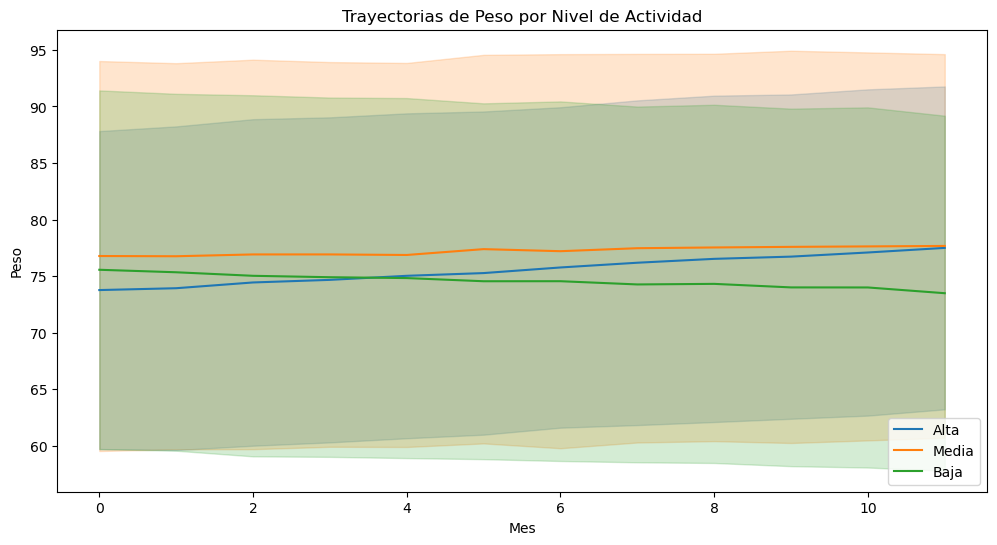

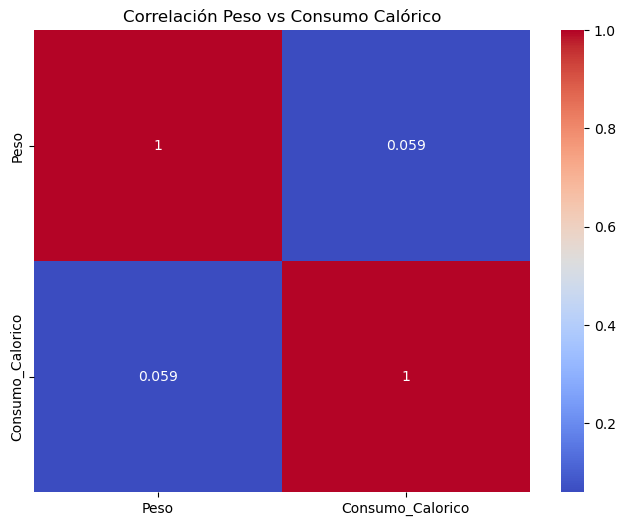


Análisis de Varianza (ANOVA):
F-statistic: 5.898323749357566
p-value: 0.0027840262008701397


In [7]:
import numpy as np
import pandas as pd

def generar_datos_nutricionales(n_participantes=200, n_meses=12):
    np.random.seed(42)
    datos = []
    for participante in range(1, n_participantes + 1):
        edad_base = np.random.normal(40, 10)
        peso_base = np.random.normal(75, 15)
        actividad_base = np.random.choice(['Baja', 'Media', 'Alta'])
        for mes in range(n_meses):
            # Reducción significativa del ruido
            ruido = np.random.normal(0, 1)  # Menos variabilidad dentro de los grupos
            
            # Aumento significativo de las diferencias entre los grupos de actividad
            if actividad_base == 'Baja':
                cambio_peso = (-2 * (mes / n_meses) + ruido)  # Aumento de la pérdida de peso para actividad baja
            elif actividad_base == 'Alta':
                cambio_peso = (4 * (mes / n_meses) + ruido)  # Aumento significativo en la ganancia de peso para actividad alta
            else:
                cambio_peso = (1 * (mes / n_meses) + ruido)  # Moderado aumento de peso para actividad media

            altura_base = 1.7 + np.random.normal(0, 0.1)
            imc = (peso_base + cambio_peso) / (altura_base ** 2)
            datos.append({
                'Participante': participante,
                'Mes': mes,
                'Edad': edad_base,
                'Peso': peso_base + cambio_peso,
                'IMC': imc,
                'Consumo_Calorico': np.random.normal(2000, 300),
                'Actividad': actividad_base
            })
    return pd.DataFrame(datos)

# Llamada para generar los datos
df_nutricionales = generar_datos_nutricionales()



def analisis_estudio_nutricional(df):
    def analisis_participante(grupo):
        modelo = np.polyfit(grupo['Mes'], grupo['Peso'], 1)
        pendiente = modelo[0]
        return pd.Series({
            'Cambio_Peso_Mensual': pendiente,
            'Peso_Inicial': grupo['Peso'].iloc[0],
            'Peso_Final': grupo['Peso'].iloc[-1],
            'Actividad': grupo['Actividad'].iloc[0]
        })
    progresion_individual = df.groupby('Participante', group_keys=False).apply(analisis_participante, include_groups=False)
    print("Progresión Individual:")
    print(progresion_individual.describe())
    analisis_actividad = progresion_individual.groupby('Actividad', group_keys=True).agg({
        'Cambio_Peso_Mensual': ['mean', 'std'],
        'Peso_Inicial': 'mean',
        'Peso_Final': 'mean'
    })
    print("\nAnálisis por Nivel de Actividad:")
    print(analisis_actividad)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Mes', y='Peso', data=df, hue='Actividad', errorbar='sd')
    plt.title('Trayectorias de Peso por Nivel de Actividad')
    plt.xlabel('Mes')
    plt.ylabel('Peso')
    plt.legend()
    plt.show()
    correlaciones = df.groupby('Participante')[['Peso', 'Consumo_Calorico']].mean().corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
    plt.title('Correlación Peso vs Consumo Calórico')
    plt.show()
    grupos_actividad = [df[df['Actividad'] == nivel]['Peso'] for nivel in df['Actividad'].unique()]
    f_statistic, p_value = stats.f_oneway(*grupos_actividad)
    print("\nAnálisis de Varianza (ANOVA):")
    print(f"F-statistic: {f_statistic}")
    print(f"p-value: {p_value}")

analisis_estudio_nutricional(df_nutricionales)



### **Ejercicio 2.1: Red de Transmisión Epidemiológica**

Caught exception in experiment: 'epydemic.sir.pInfected'


Superspreaders: [(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]


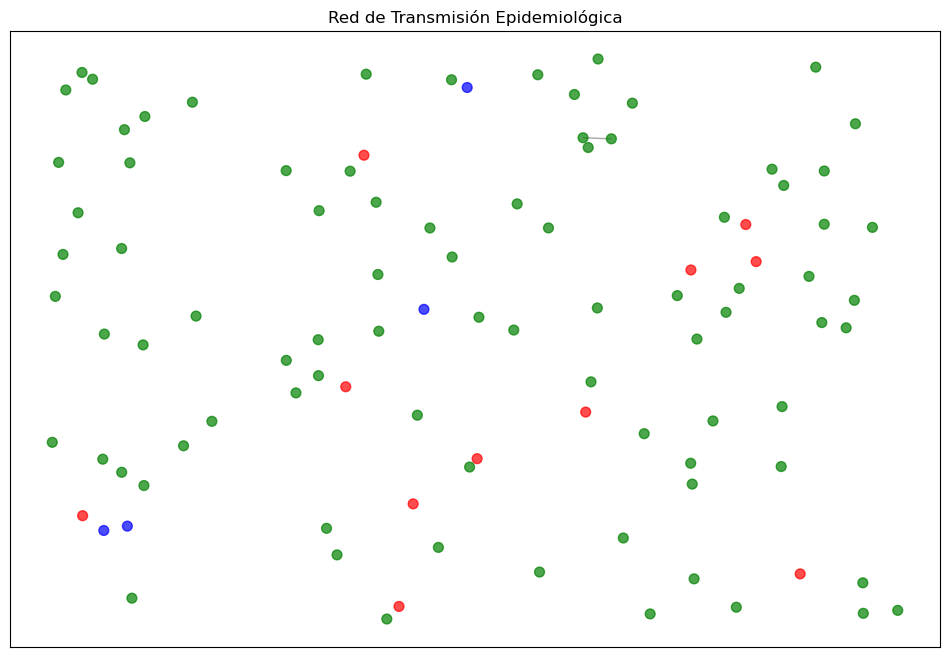

In [11]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances
from epydemic import SIR, StochasticDynamics

# Configuración de semilla para reproducibilidad
np.random.seed(42)

# Función para generar datos de los nodos
def generar_nodos(num_nodos):
    nodos = pd.DataFrame({
        'id': range(num_nodos),
        'edad': np.random.normal(45, 15, num_nodos).astype(int),
        'estado_salud': np.random.choice(['S', 'I', 'R'], num_nodos, p=[0.85, 0.10, 0.05]),
        'latitud': np.random.uniform(40.0, 42.0, num_nodos),
        'longitud': np.random.uniform(-3.8, -3.6, num_nodos)
    })
    return nodos

# Función para crear el grafo
def crear_grafo(nodos):
    G = nx.Graph()
    for _, row in nodos.iterrows():
        G.add_node(row['id'], 
                  edad=row['edad'],
                  estado=row['estado_salud'],
                  posicion=(row['latitud'], row['longitud']))
    return G

# Función para calcular distancias y agregar aristas basadas en proximidad
def agregar_aristas_por_distancia(G, nodos):
    posiciones = np.radians(nodos[['latitud', 'longitud']].values)
    distancias = haversine_distances(posiciones) * 6371  # Radio terrestre en km
    for i in range(len(nodos)):
        for j in range(i + 1, len(nodos)):
            if distancias[i, j] < 1:
                G.add_edge(i, j, peso=1 / distancias[i, j])
    return G

# Función para calcular centralidades
def calcular_centralidades(G):
    centralidades = {
        'grado': nx.degree_centrality(G),
        'intermediacion': nx.betweenness_centrality(G),
        'cercania': nx.closeness_centrality(G)
    }
    return centralidades

# Función para identificar superspreaders
def identificar_superspreaders(centralidad_intermediacion):
    return sorted(centralidad_intermediacion.items(), key=lambda x: x[1], reverse=True)[:5]

# Función para ejecutar la simulación SIR
def ejecutar_simulacion(G):
    # Crear el modelo SIR
    sir = SIR()

    # Configurar parámetros directamente en el modelo
    sir.pInfect = 0.3  # Probabilidad de contagio
    sir.pRemove = 0.1  # Probabilidad de recuperación

    # Asociar el grafo con el modelo SIR
    sir.network = G
    
    # Ejecutar la simulación
    sim = StochasticDynamics(sir, G)
    return sim.run()

# Función para visualizar la red
def visualizar_red(G):
    pos = {n: (G.nodes[n]['posicion'][1], G.nodes[n]['posicion'][0]) for n in G.nodes}
    
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(
        G, pos,
        node_color=[{'S': 'green', 'I': 'red', 'R': 'blue'}[G.nodes[n]['estado']] for n in G.nodes],
        node_size=50,
        with_labels=False,
        edge_color='gray',
        alpha=0.7
    )
    plt.title("Red de Transmisión Epidemiológica")
    plt.show()

# Función principal
def main():
    # Generar nodos
    nodos = generar_nodos(100)
    
    # Crear grafo
    G = crear_grafo(nodos)
    
    # Agregar aristas basadas en distancia
    G = agregar_aristas_por_distancia(G, nodos)
    
    # Calcular y mostrar centralidades
    centralidades = calcular_centralidades(G)
    superspreaders = identificar_superspreaders(centralidades['intermediacion'])
    print(f"Superspreaders: {superspreaders}")
    
    # Ejecutar simulación
    res = ejecutar_simulacion(G)
    
    # Visualizar la red
    visualizar_red(G)

# Ejecutar el programa
if __name__ == "__main__":
    main()
